<a href="https://colab.research.google.com/github/amit-kumar9766/Deeplearning.ai/blob/master/Locale_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd  #pandas for using dataframe and reading csv 
import numpy as np   #numpy for vector operations and basic maths 
#import simplejson    #getting JSON in simplified format
import urllib        #for url stuff
#import gmaps       #for using google maps to visulalize places on maps
import re            #for processing regular expressions
import datetime      #for datetime operations
import calendar      #for calendar for datetime operations
import time          #to get the system time
import scipy         #for other dependancies
from sklearn.cluster import KMeans # for doing K-means clustering
from haversine import haversine # for calculating haversine distance
import math          #for basic maths operations
import seaborn as sns #for making plots
import matplotlib.pyplot as plt # for plotting
import os  # for os commands
from scipy.misc import imread, imresize, imsave  # for plots 
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_notebook, show
from IPython.display import HTML
from matplotlib.pyplot import *
from matplotlib import cm
from matplotlib import animation
import io

In [0]:
import pandas as pd

In [0]:
data=pd.read_csv('data.csv')

In [0]:
data.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


In [0]:
data['package_id'].value_counts()

1.0    3503
2.0    2651
6.0     502
4.0     412
3.0     375
7.0     101
5.0       6
Name: package_id, dtype: int64

In [0]:
data.tail()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
43426,185937,14364,12,NaN,2,1147.0,452.0,15.0,NaN,11/24/2013 18:00,11/24/2013 19:41,1,0,11/24/2013 14:25,13.03064,77.64910,12.952780,77.59088,0
43427,185938,48727,12,NaN,2,393.0,466.0,15.0,NaN,11/26/2013 1:00,11/26/2013 1:55,1,0,11/24/2013 14:30,13.19956,77.70688,13.017436,77.64458,0
43428,185939,48729,12,1.0,3,974.0,NaN,15.0,NaN,11/24/2013 18:30,11/24/2013 23:30,0,0,11/24/2013 14:35,13.07557,77.55904,NaN,NaN,0
43429,185940,30724,87,NaN,2,1263.0,542.0,15.0,NaN,11/24/2013 16:00,11/24/2013 16:40,0,0,11/24/2013 14:43,12.96897,77.59456,12.938230,77.62289,0
43430,185941,48730,12,NaN,2,689.0,393.0,15.0,NaN,11/25/2013 5:00,11/25/2013 6:05,0,1,11/24/2013 14:50,12.97672,77.64927,13.199560,77.70688,0


In [0]:
df=data.fillna('')

In [0]:
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,,2,83,448,,,1/1/2013 2:00,,0,0,1/1/2013 1:39,12.9241,77.6723,12.9273,77.6358,0
1,132513,21413,12,,2,1010,540,,,1/1/2013 9:00,,0,0,1/1/2013 2:25,12.9669,77.7494,12.9277,77.6266,0
2,132514,22178,12,,2,1301,1034,,,1/1/2013 3:30,,0,0,1/1/2013 3:08,12.9372,77.6269,13.0479,77.5978,0
3,132515,13034,12,,2,768,398,,,1/1/2013 5:45,,0,0,1/1/2013 4:39,12.99,77.5533,12.9714,77.6391,0
4,132517,22180,12,,2,1365,849,,,1/1/2013 9:00,,0,0,1/1/2013 7:53,12.8457,77.6779,12.9543,77.6007,0


In [0]:
#Analysing the data 

In [0]:
df.columns

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'to_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation'],
      dtype='object')

In [0]:
from datetime import date, datetime
df['from_date']=pd.to_datetime(df['from_date'])


In [0]:
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,,2,83,448,,,2013-01-01 02:00:00,,0,0,1/1/2013 1:39,12.9241,77.6723,12.9273,77.6358,0
1,132513,21413,12,,2,1010,540,,,2013-01-01 09:00:00,,0,0,1/1/2013 2:25,12.9669,77.7494,12.9277,77.6266,0
2,132514,22178,12,,2,1301,1034,,,2013-01-01 03:30:00,,0,0,1/1/2013 3:08,12.9372,77.6269,13.0479,77.5978,0
3,132515,13034,12,,2,768,398,,,2013-01-01 05:45:00,,0,0,1/1/2013 4:39,12.99,77.5533,12.9714,77.6391,0
4,132517,22180,12,,2,1365,849,,,2013-01-01 09:00:00,,0,0,1/1/2013 7:53,12.8457,77.6779,12.9543,77.6007,0


In [0]:
#Maximum of the things are happening in the year 2014 only

In [0]:
Approach:
Economics:
1. locate important places in the country for traffic
2.We can see important time of the year when we can have demand and when there is low demand

Fraud system :
Can we realise where this booking but there is no pickup?
Can we have the places to see maximum no of cancellations,

#We can cluster the dataset realising how more demand can be met

times, day and areas have the highest demand---Imp---date to time modelue


In [0]:
df['from_lat']=pd.to_numeric(df['from_lat'])
df['from_lat']=df['from_lat'].fillna(0)
df['from_long']=pd.to_numeric(df['from_long'])
df['from_long']=df['from_long'].fillna(0)
df['to_long']=pd.to_numeric(df['to_long'])
df['to_long']=df['to_long'].fillna(0)
df['to_lat']=pd.to_numeric(df['to_lat'])
df['to_lat']=df['to_lat'].fillna(0)



In [0]:
#Lets make a whole column of booking
df['booking']=df['online_booking']+df['mobile_site_booking']

In [0]:
some more points to analyse:
1.Customers are focusing on mobile vs online bookings?Which medium should be more active
2.Which location people are cancelling the car more?

In [0]:
df['from_lat']=pd.to_numeric(df['from_lat'])
df['from_long']=pd.to_numeric(df['from_long'])
df['to_lat']=pd.to_numeric(df['to_lat'])
df['to_long']=pd.to_numeric(df['to_long'])

In [0]:
#Outliers Detection

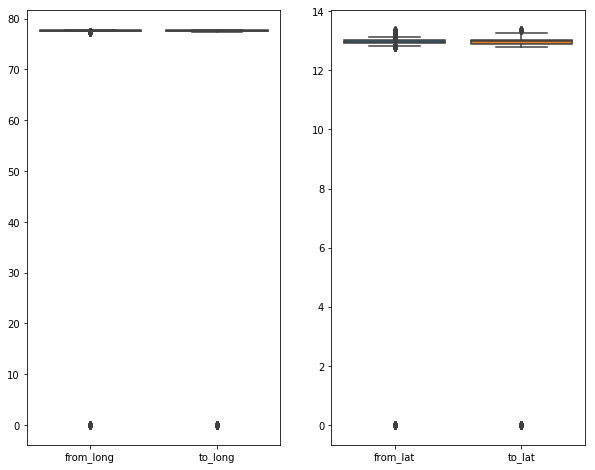

In [0]:
fig=plt.figure(figsize=(10, 8))
for i,loc in enumerate((['from_long','to_long'],['from_lat','to_lat'])):
    plt.subplot(1,2,i+1)
    sns.boxplot(data=df,order=loc)

In [0]:
df=df[df.to_lat>=12]
df=df[df.from_lat>12]
df=df[df.to_long>70]
df=df[df.from_long<90]


In [0]:
df.shape

(34293, 20)

In [0]:
Which area id and user id lead to more cancellations?

Object `cancellations` not found.


In [0]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,id,user_id,vehicle_model_id,travel_type_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,booking
count,34293.00,34293.00,34293.00,34293.00,34293.00,34293.00,34293.00,34293.00,34293.00,34293.00,34293.00,34293.00
mean,159108.05,30821.16,24.74,2.00,0.36,0.05,12.99,77.64,13.03,77.64,0.08,0.41
std,15418.15,10864.98,26.25,0.01,0.48,0.21,0.09,0.06,0.11,0.06,0.27,0.49
min,132512.00,16.00,1.00,1.00,0.00,0.00,12.78,77.39,12.78,77.39,0.00,0.00
25%,145675.00,24639.00,12.00,2.00,0.00,0.00,12.93,77.59,12.95,77.58,0.00,0.00
50%,159280.00,31913.00,12.00,2.00,0.00,0.00,12.97,77.64,12.98,77.65,0.00,0.00
75%,172215.00,39144.00,17.00,2.00,1.00,0.00,13.01,77.69,13.20,77.71,0.00,1.00
max,185941.00,48730.00,91.00,2.00,1.00,1.00,13.37,77.79,13.37,77.79,1.00,1.00


In [0]:
#Categorical Variables

In [0]:
Which user ids do more mobile and online bookings? Same with area id
Which user ids have more cancellation?Same with user id
Which user ids are more 

In [0]:
df.columns

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'to_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation'],
      dtype='object')

In [0]:
The latitude of Bangalore, Karnataka, India is 12.972442, and the longitude is 77.580643. Bangalore, Karnataka, India is located at India country in the Cities place category
with the gps coordinates of 12° 58' 20.7912'' N and 77° 34' 50.3148'' E.

In [0]:
df['from_lat'].values

array([12.92415, 12.96691, 12.937222, ..., 13.075569999999999, 12.96897,
       12.97672], dtype=object)

In [0]:
#Putting default values for missing values of lat long

In [0]:
df['from_lat']=df['from_lat'].fillna(12.972442)
df['from_long']=df['from_long'].fillna(77.580643)
df['to_lat']=df['to_lat'].fillna(12.972442)
df['to_long']=df['to_long'].fillna(77.580643)

In [0]:
#Dropping points

In [0]:
import folium
map_1 = folium.Map(location=[12.972442, 77.580643])
for each in df[:1000].iterrows():
    folium.CircleMarker([each[1]['to_lat'],each[1]['to_long']],
                        radius=3,
                        color='red',
                        
                        fill_color='#FD8A6C'
                        ).add_to(map_1)
map_1

In [0]:
#PIckoff points

In [0]:
import folium
map_1 = folium.Map(location=[12.972442, 77.580643])
for each in df[:1000].iterrows():
    folium.CircleMarker([each[1]['from_lat'],each[1]['from_long']],
                        radius=3,
                        color='red',
                        
                        fill_color='#FD8A6C'
                        ).add_to(map_1)
map_1

In [0]:
# These are the pickup locations for the company to match demand supply!

In [0]:
#As you can see above that there are some points just outside the boundary but many of them lie in or around Bangalore


In [0]:
df.columns

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'to_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation',
       'booking'],
      dtype='object')

In [0]:
#Univariate Analysis

Text(0.5,1,'User ids distribution')

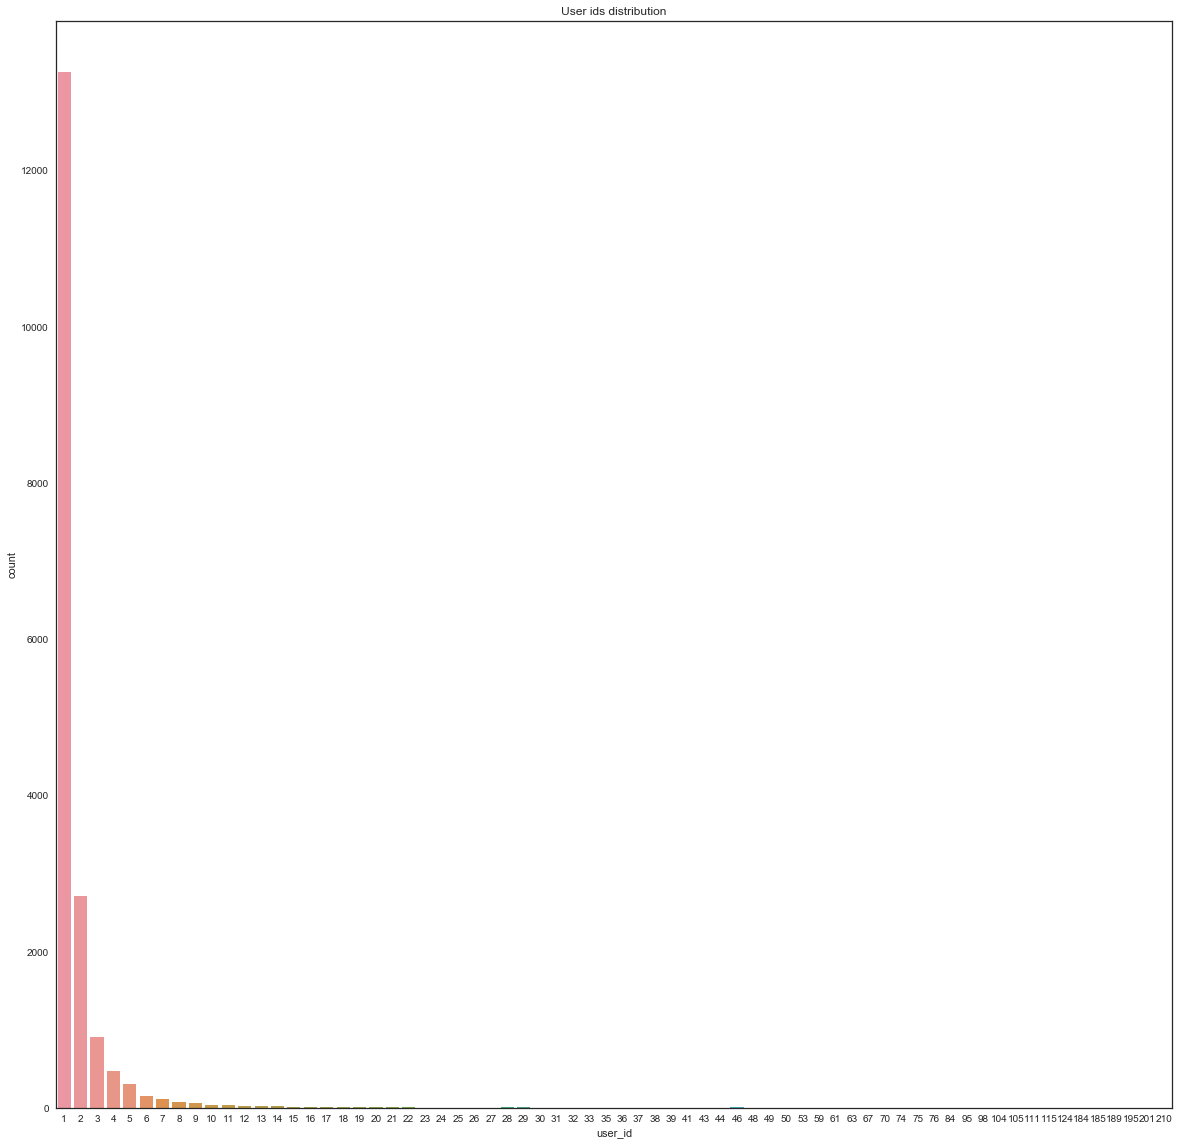

In [0]:
plt.figure(figsize=(20,20))
sns.countplot(df['user_id'].value_counts())
plt.title('User ids distribution')

#Distribution suggests that some user-ids are more compared to other!

In [0]:
def plot(x='online_booking'):
    plt.figure(figsize=(20,10))
    new=df.groupby(['user_id'])[x].sum().reset_index()
    plt.plot(new['user_id'],new[x])
    plt.xlabel('users')
    plt.ylabel(x)

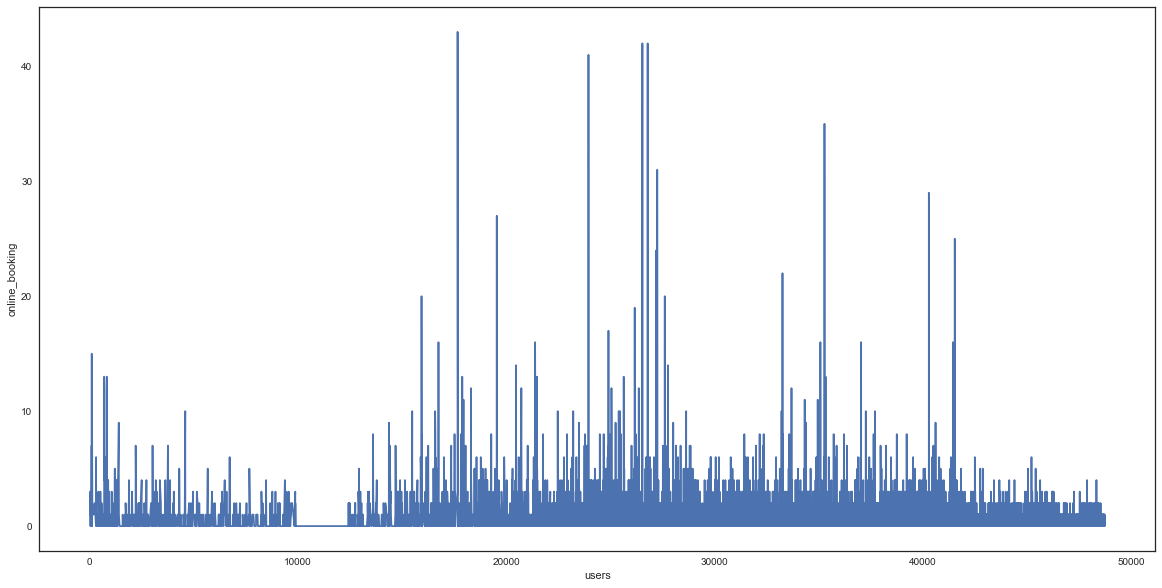

In [0]:
plot('online_booking')

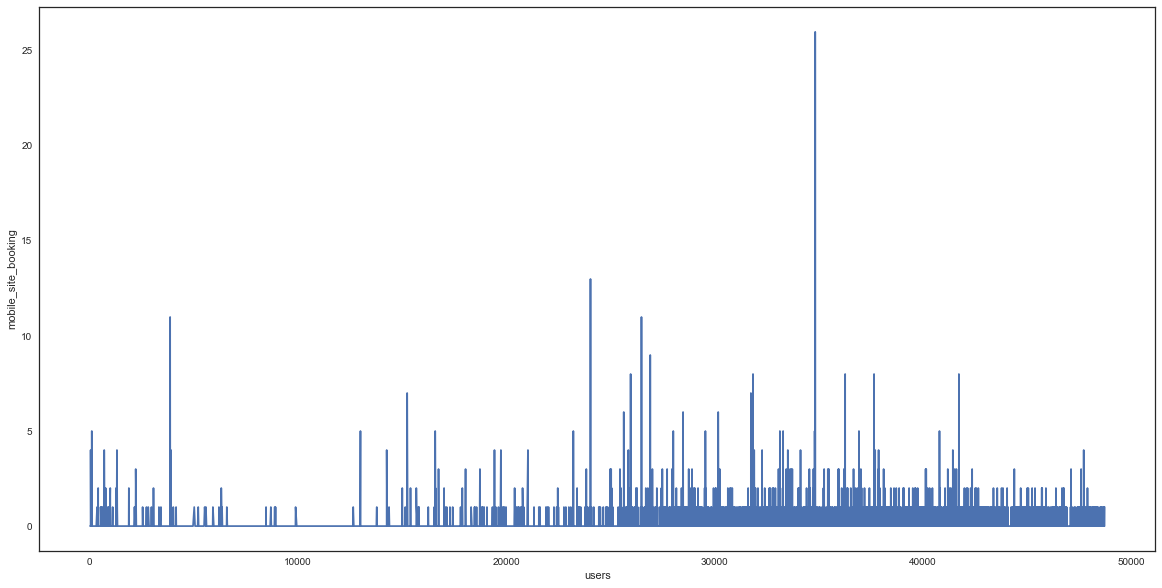

In [0]:
plot('mobile_site_booking')

#### Online booking is more popular among the users!Company can make mobile experience good for customers maybe!

Text(0,0.5,'count')

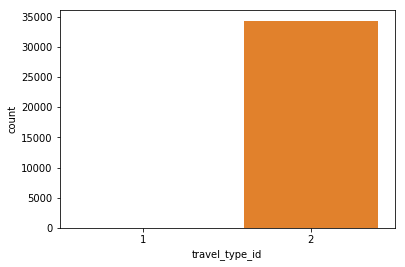

In [0]:
sns.countplot(df['travel_type_id'])
plt.xlabel('travel_type_id')
plt.ylabel('count')

In [0]:
#Only 2 travel type ids where is 2 is the most

In [0]:
df.columns

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'to_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation',
       'booking', 'bookings'],
      dtype='object')

Text(0,0.5,'count')

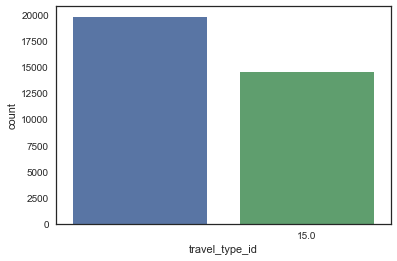

In [0]:
sns.countplot(df['from_city_id'])
plt.xlabel('travel_type_id')
plt.ylabel('count')

Text(0,0.5,'count')

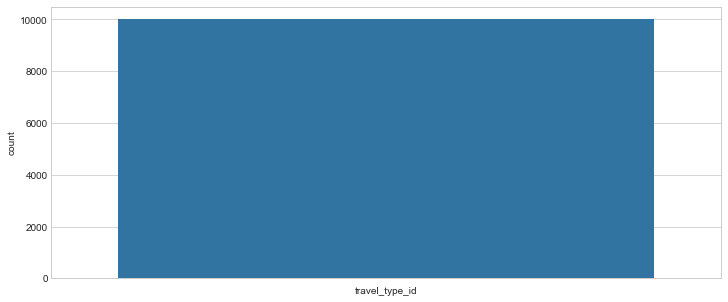

In [0]:
sns.set_style("whitegrid")

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)


sns.countplot(df['to_city_id'][0:10000])
plt.xlabel('travel_type_id')
plt.ylabel('count')

In [0]:
#One is the maximum again to travel id 

In [0]:
# From area Ids,to area Ids

Text(0.5,1,'area ids distribution')

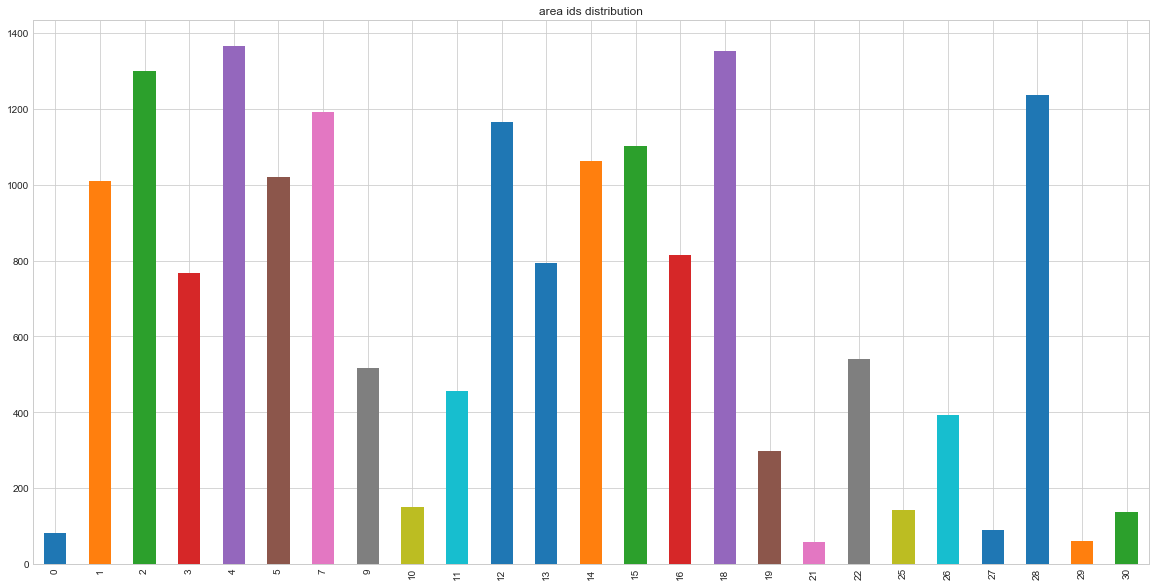

In [0]:
plt.figure(figsize=(20,10))
df['from_area_id'][0:25].plot(kind='bar')
plt.title('area ids distribution')

##### Distribution is not uniform.We can obviously see some areas have more pickups!

In [0]:
df['from_area_id']=pd.to_numeric(df['from_area_id'])

In [0]:
def plot(x='booking'):
    plt.figure(figsize=(20,7))
    new=df.groupby(['from_area_id'])[x].sum().reset_index()
    plt.plot(new['from_area_id'],new[x])
    plt.xlabel('Area id')
    plt.ylabel(x)

Text(0.5,1,'bookings on the basis of area')

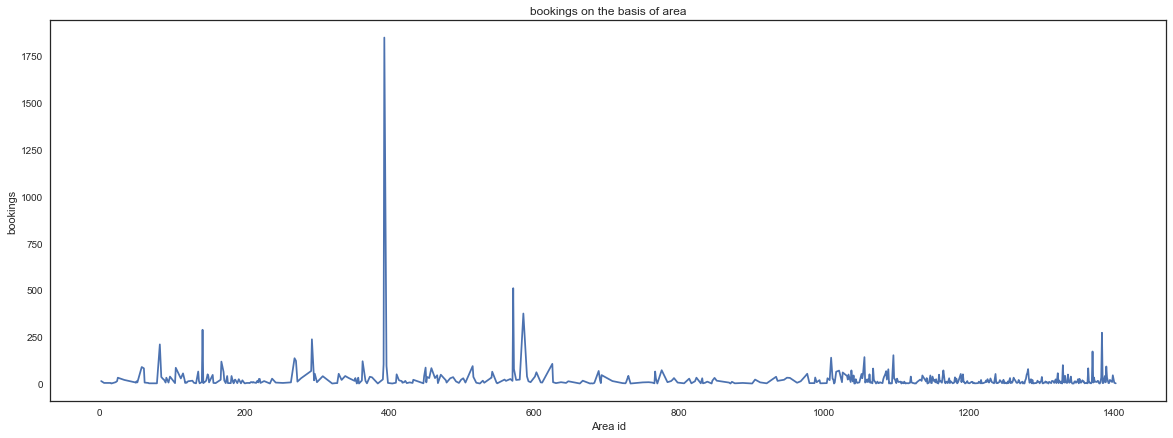

In [0]:
plot('bookings')
plt.title('bookings on the basis of area')

In [0]:
#Company has to see which area id has maximum bookings

Text(0.5,1,'Cancellation on the basis of area')

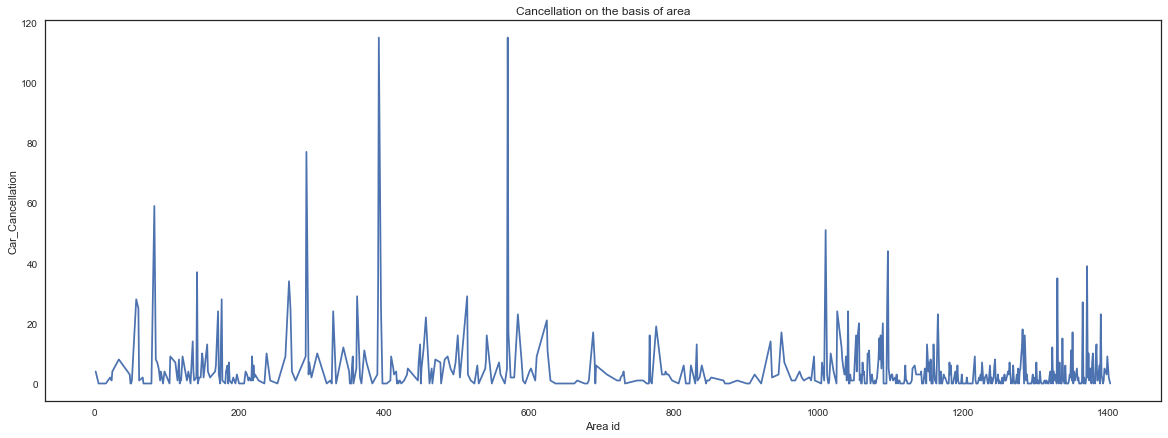

In [0]:
plot('Car_Cancellation')
plt.title('Cancellation on the basis of area')

In [0]:
#Area ids which have less bookings but maximum cancellations needs attention!!

In [0]:
df['to_date']=pd.to_datetime(df['to_date'])

df['to_date']=df['to_date'].fillna(0)

In [0]:
dow_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# mm names for plot mapping
mm_names = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

# month (pickup and dropoff)
df['mm_pickup'] = df.from_date.dt.month.astype(np.uint8)
#df['mm_dropoff'] = df.to_date.dt.month.astype(np.uint8)
# day of week
df['dow_pickup'] = df.from_date.dt.weekday.astype(np.uint8)
#df['dow_dropoff'] = df.to_date.dt.weekday.astype(np.uint8)
# day hour
df['hh_pickup'] = df.from_date.dt.hour.astype(np.uint8)
#df['hh_dropoff'] = df.to_date.dt.hour.astype(np.uint8)

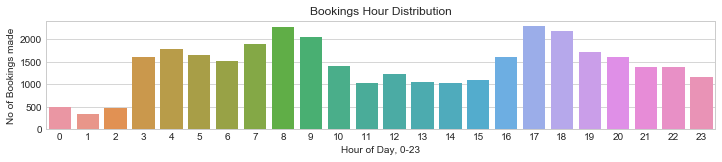

In [0]:
plt.figure(figsize=(12,2))

data = df.groupby('hh_pickup').aggregate({'booking':'count'}).reset_index()
sns.barplot(x='hh_pickup', y='booking', data=data)

plt.title('Bookings Hour Distribution')
plt.xlabel('Hour of Day, 0-23')
plt.ylabel('No of Bookings made')
pass

8th hour and 17th hour have the maximum bookings whereas 1st hour has the lowest booking

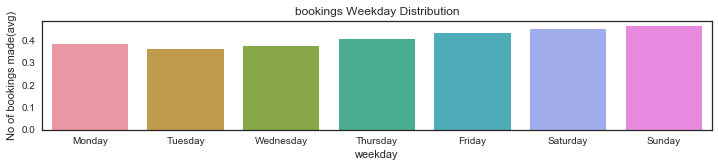

In [0]:
plt.figure(figsize=(12,2))

data = df.groupby('dow_pickup').aggregate({'bookings':'mean'}).reset_index()
sns.barplot(x='dow_pickup', y='bookings', data=data)

plt.title('bookings Weekday Distribution')
plt.xlabel('weekday')
plt.xticks(range(0,7), dow_names, rotation='horizontal')
plt.ylabel('No of bookings made(avg)')
pass

Bookings made are maximum on Sunday and Saturday(weekends)

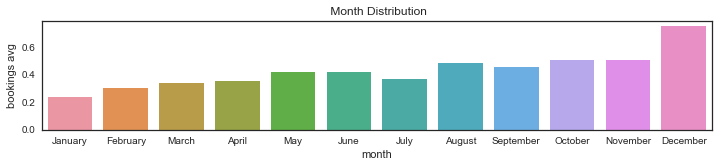

In [0]:
plt.figure(figsize=(12,2))

data = df.groupby('mm_pickup').aggregate({'bookings':'mean'}).reset_index()
sns.barplot(x='mm_pickup', y='bookings', data=data)

plt.title(' Month Distribution')
plt.xlabel('month')
plt.xticks(range(0,12), mm_names[:12], rotation='horizontal')
plt.ylabel('bookings avg')
pass


Most of the bookings are in December

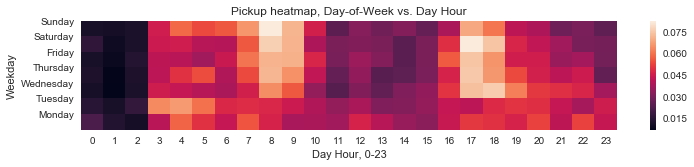

In [0]:
plt.figure(figsize=(12,2))
sns.heatmap(data=pd.crosstab(df.dow_pickup, 
                             df.hh_pickup, 
                             values=df.bookings, 
                             aggfunc='count',
                             normalize='index'))

plt.title('Pickup heatmap, Day-of-Week vs. Day Hour')
plt.ylabel('Weekday') ; plt.xlabel('Day Hour, 0-23')
plt.yticks(range(0,7), dow_names[::-1], rotation='horizontal')
pass


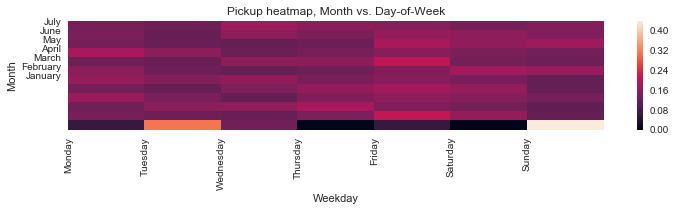

In [0]:
plt.figure(figsize=(12,2))
sns.heatmap(data=pd.crosstab(df.mm_pickup, 
                             df.dow_pickup, 
                             values=df.bookings, 
                             aggfunc='count',
                             normalize='index'))

plt.title('Pickup heatmap, Month vs. Day-of-Week')
plt.ylabel('Month') ; plt.xlabel('Weekday')
plt.xticks(range(0,7), dow_names, rotation='vertical')
plt.yticks(range(0,7), mm_names[:7][::-1], rotation='horizontal')
pass

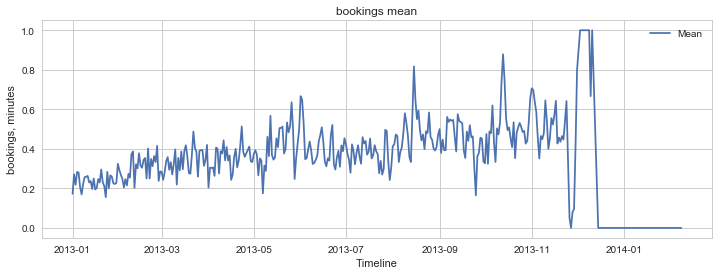

In [0]:
data = df.groupby(df.from_date.dt.date).aggregate({'bookings':['mean']})
plt.figure(figsize=(12,4))
plt.title('bookings mean')
plt.ylabel('bookings, minutes') ; plt.xlabel('Timeline')
plt.plot(data)
plt.legend(['Mean'])
pass

In [0]:
#it seems there might be mean decrease in bookings in 2014

In [0]:
df=df.drop(['booking'],axis=1)

In [0]:
df.columns

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'to_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation',
       'bookings', 'lat_bin', 'lon_bin', 'pickup_cluster', 'dropoff_cluster',
       'Regions pickup_cluster', 'Regions dropoff_cluster', 'mm_pickup',
       'dow_pickup', 'hh_pickup'],
      dtype='object')

In [0]:
df['booking_created'].head()

0    1/1/2013 1:39
1    1/1/2013 2:25
2    1/1/2013 3:08
3    1/1/2013 4:39
4    1/1/2013 7:53
Name: booking_created, dtype: object

In [0]:

df['booking_created']=pd.to_datetime(df['booking_created'])
df['booking_created']=df['booking_created'].fillna(0)
dow_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# mm names for plot mapping
mm_names = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

df['book_month'] = df.booking_created.dt.month.astype(np.uint8)
df['book_week'] = df.booking_created.dt.weekday.astype(np.uint8)
df['book_hour'] = df.booking_created.dt.hour.astype(np.uint8)

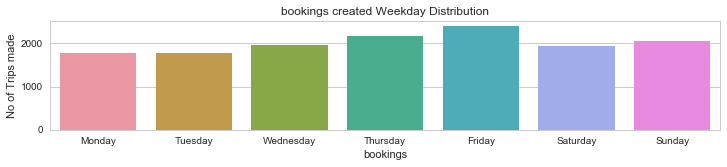

In [0]:
plt.figure(figsize=(12,2))

data = df.groupby('book_week').aggregate({'bookings':'sum'}).reset_index()
sns.barplot(x='book_week', y='bookings', data=data)

plt.title('bookings created Weekday Distribution')
plt.xlabel('bookings')
plt.xticks(range(0,7), dow_names, rotation='horizontal')
plt.ylabel('No of Trips made')
pass

mostly bookings were created on Friday

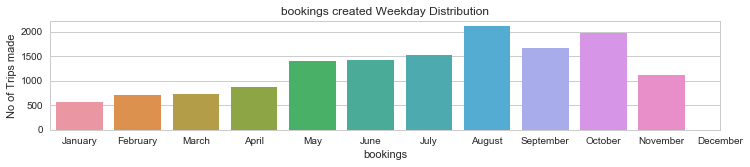

In [0]:
plt.figure(figsize=(12,2))

data = df.groupby('book_month').aggregate({'bookings':'sum'}).reset_index()
sns.barplot(x='book_month', y='bookings', data=data)

plt.title('bookings created Weekday Distribution')
plt.xlabel('bookings')
plt.xticks(range(0,12), mm_names, rotation='horizontal')
plt.ylabel('No of Trips made')
pass

#No bookings are created in December---it is vital to see!

In [0]:
from haversine import haversine
def calculate_haversine_distance(var_row):
    return haversine((var_row["from_lat"], var_row["from_long"]), 
                     (var_row["to_lat"], var_row["to_long"]))
# #Calculating the Haversine Distance
# #The haversine formula determines the great-circle distance between two points on a sphere 
# #given their longitudes and latitudes.
df["haversine_distance"] = df.apply(lambda row: calculate_haversine_distance(row), axis=1)

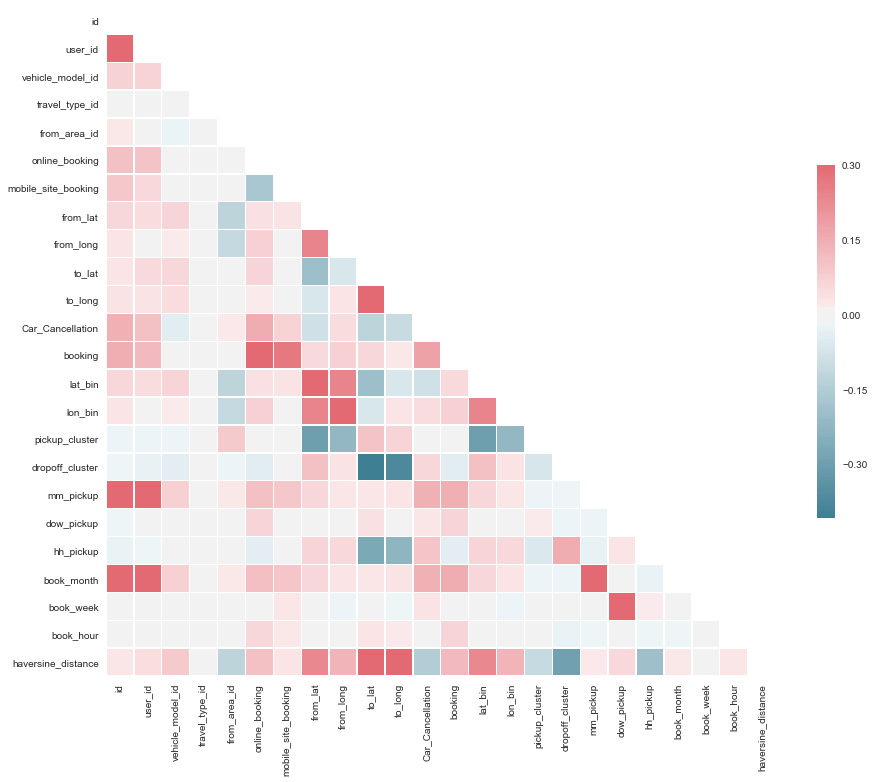

In [0]:
sns.set(style="white")

# Generate a large random dataset
temp3 = df.copy()

# Compute the correlation matrix
corr = temp3.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

inference:
1.Not various features are correlated to each other!Only those features which evolved from other feature are correlated!


#Which vehicle_id are cancelled more??

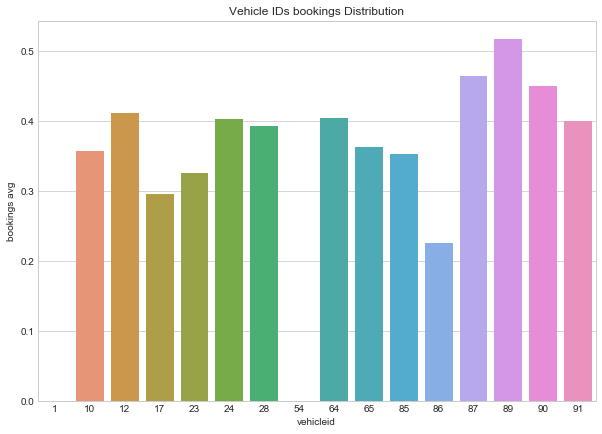

In [0]:
data = df.groupby('vehicle_model_id').aggregate({'booking':'mean'}).reset_index()
plt.figure(figsize=(10,7))
sns.barplot(x='vehicle_model_id', y='booking', data=data)

plt.title('Vehicle IDs bookings Distribution')
plt.xlabel('vehicleid')
plt.ylabel('bookings avg')
pass

#There are some vechicle ids which have less bookings and some have no bookings at all(55)

# vehicle ids cancellation

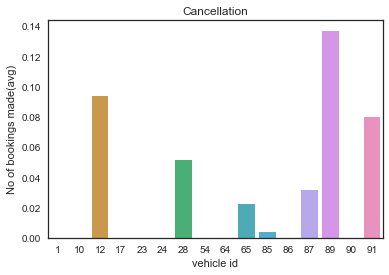

In [0]:
data = df.groupby('vehicle_model_id').aggregate({'Car_Cancellation':'mean'}).reset_index()
sns.barplot(x='vehicle_model_id', y='Car_Cancellation', data=data)

plt.title('Cancellation')
plt.xlabel('vehicle id')
plt.ylabel('No of bookings made(avg)')
pass

In [0]:
#We can see some vehicle ids are cancelled more!!There might be a problem with the model of the car!!

In [0]:
No need of clustering here as The area Ids are already given!

Text(0.5,1,'distribution of AreaIDs')

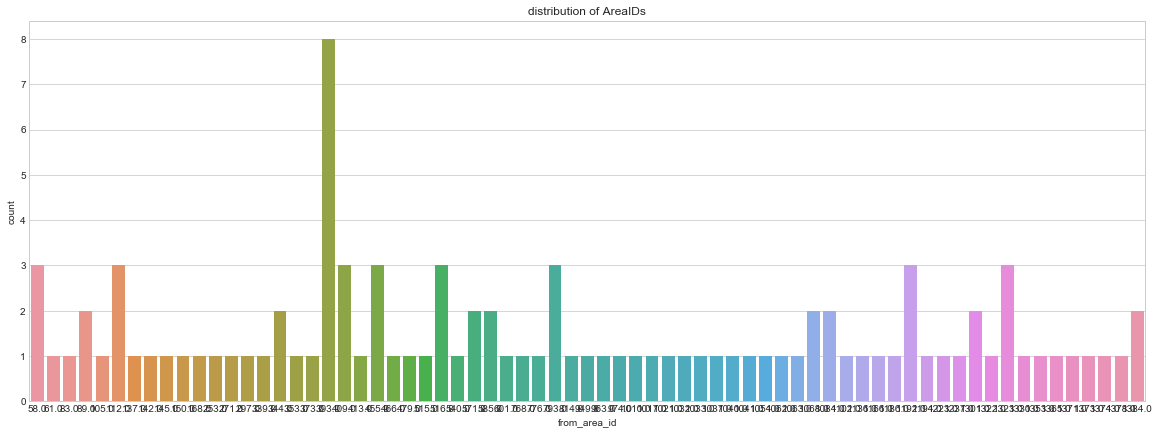

In [0]:
plt.figure(figsize=(20,7))
sns.countplot(df['from_area_id'][0:100])
plt.title("distribution of AreaIDs")

In [0]:
#Some areas are more important to others as we can see

Bookings based on AREA_IDS

(586, 2)
(36, 2)


Text(0,0.5,'No of bookings made(avg)')

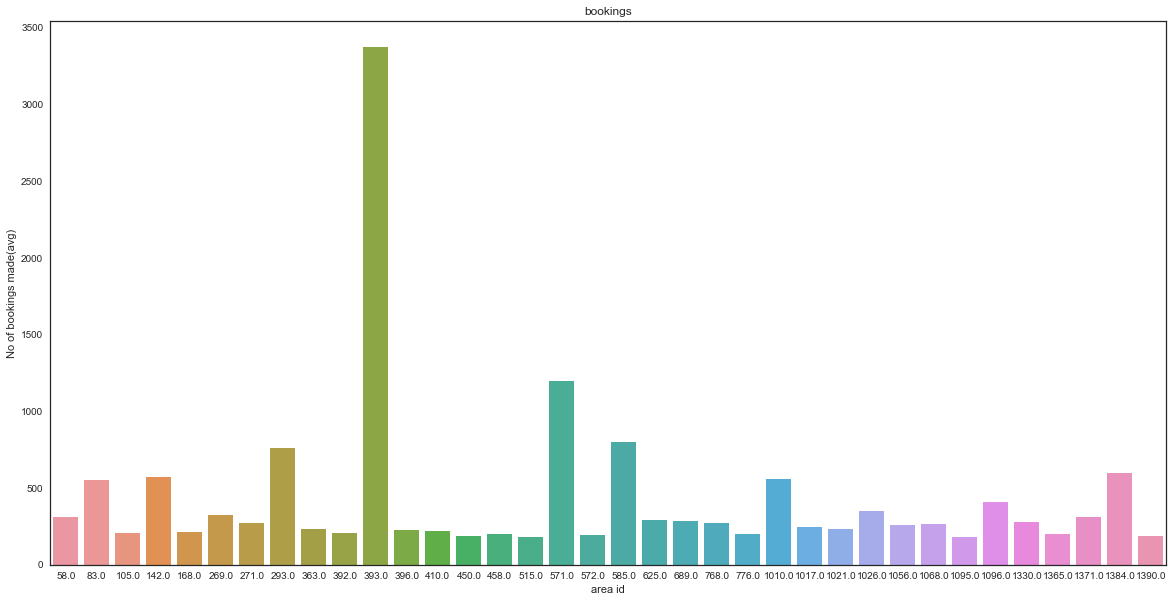

In [0]:
data=df.groupby(['from_area_id']).aggregate({'bookings':'count'}).reset_index()
data=data.sort_values(by='bookings')
print(data.shape)
data=data[550:len(data)]
print(data.shape)
#print(data.head())
plt.figure(figsize=(20,10))
sns.barplot(x='from_area_id', y='bookings',data=data)
plt.title('bookings')
plt.xlabel('area id')
plt.ylabel('No of bookings made(avg)')

 THese area IDs are having maximum bookings!!

Can we represent these area_ids on the map to better visualise it?

Cancellation on basis of areas

(599, 2)
(50, 2)


Text(0,0.5,'No of cancellation made(avg)')

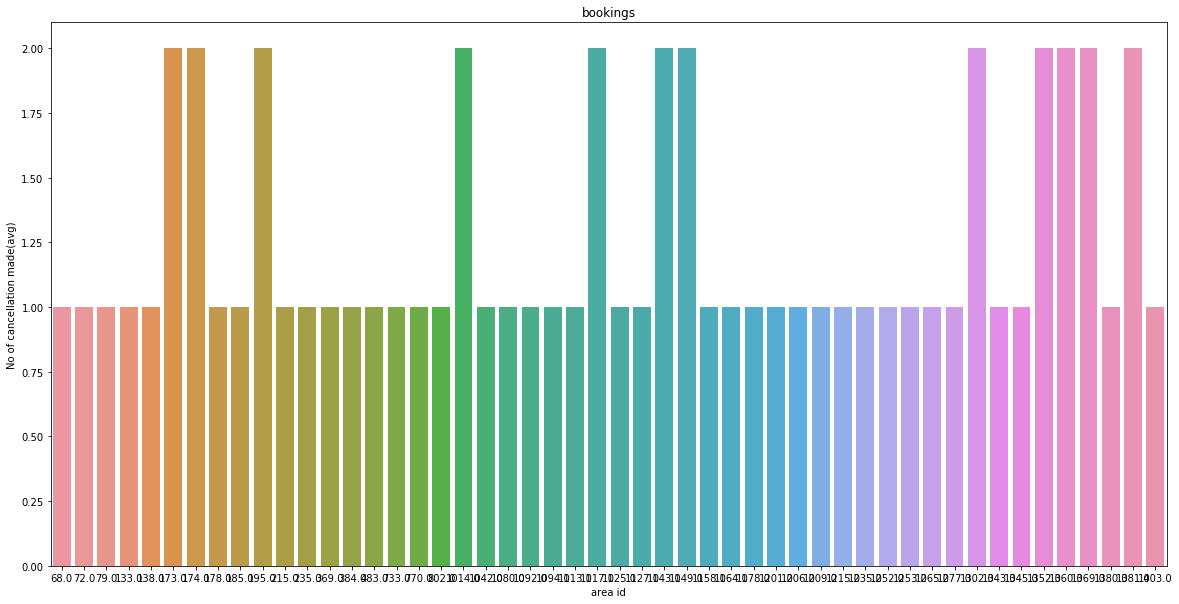

In [0]:
data=df.groupby(['from_area_id']).aggregate({'Car_Cancellation':'count'}).reset_index()
data=data.sort_values(by='Car_Cancellation',ascending=True)
print(data.shape)
data=data[0:50]
print(data.shape)
#print(data.head())
plt.figure(figsize=(20,10))
sns.barplot(x='from_area_id', y='Car_Cancellation',data=data)
plt.title('bookings')
plt.xlabel('area id')
plt.ylabel('No of cancellation made(avg)')

Some area IDs have more cancellation and should be seen!

In [0]:
df.columns

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'to_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation',
       'lat_bin', 'lon_bin', 'pickup_cluster', 'dropoff_cluster', 'mm_pickup',
       'dow_pickup', 'hh_pickup', 'book_month', 'book_week', 'book_hour',
       'haversine_distance', 'bookings'],
      dtype='object')

Monday -  morning:958 , day:1712 , mid-day:1130 night:1120
Tuesday -  morning:765 , day:1414 , mid-day:1120 night:1178
Wednesday -  morning:741 , day:1543 , mid-day:1214 night:1236
Thursday -  morning:898 , day:1497 , mid-day:1186 night:1394
Friday -  morning:914 , day:1498 , mid-day:1405 night:1837
Saturday -  morning:1194 , day:1340 , mid-day:1131 night:1395
Sunday -  morning:881 , day:1168 , mid-day:1130 night:1294


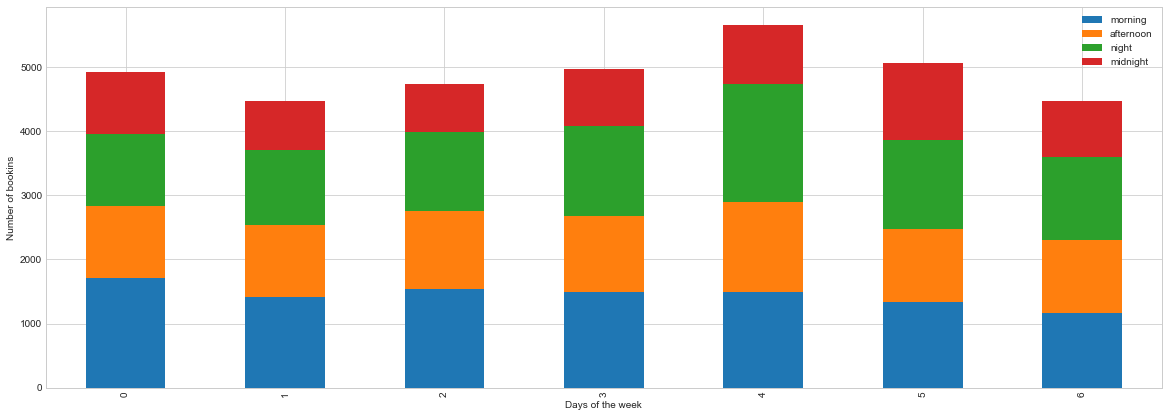

In [0]:
import warnings
warnings.filterwarnings("ignore")
time = df[['from_date','to_date']]
time['tpep_pickup_datetime'] = pd.to_datetime(time['from_date'])
time["pickup_day"] = time['tpep_pickup_datetime'].dt.strftime('%u').astype(int)
time["pickup_hour"] = time['tpep_pickup_datetime'].dt.strftime('%H').astype(int)
set(time['pickup_day'].values)
day_bookings = []
night_bookings= []
mid_night_bookings = []
afternoon_bookings = []
for i in range(1,8):
    day_bookings.append(time[(time.pickup_day == i) & (time.pickup_hour >= 6) & (time.pickup_hour < 12)].shape[0])
    night_bookings.append(time[(time.pickup_day == i) & (time.pickup_hour >= 18) & (time.pickup_hour <= 23)].shape[0])
    mid_night_bookings.append(time[(time.pickup_day == i) & (time.pickup_hour >= 0) & (time.pickup_hour < 6)].shape[0])
    afternoon_bookings.append(time[(time.pickup_day == i) & (time.pickup_hour >= 12) & (time.pickup_hour < 18)].shape[0])
    
days =pd.DataFrame({'morning':day_bookings, 'afternoon':afternoon_bookings, 'night':night_bookings, 'midnight':mid_night_bookings})
days.plot(kind='bar', stacked=True,figsize=(20,7))
plt.xlabel('Days of the week')
plt.ylabel('Number of bookins')
plt.tick_params(axis='both', which='minor')
plt.plot()
    #plt.xticks(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for i in range(0,len(days)):
    print ("{} -  morning:{} , day:{} , mid-day:{} night:{}".format(days[i],mid_night_bookings[i],day_bookings[i],afternoon_bookings[i],night_bookings[i]))
    
   # return time

Inferences:
1.More people want to go on Friday and Saturday as they want to go for holidays! But Mondays also as some people might be 
taking the whole week off!
2.mostly the business happens in the daytime and happens less in the nighttime which is logical

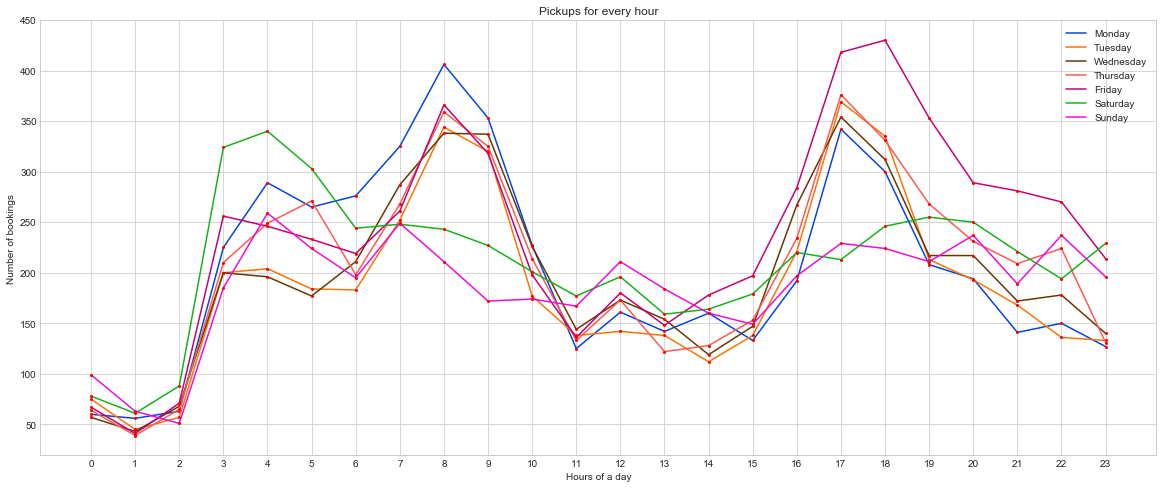

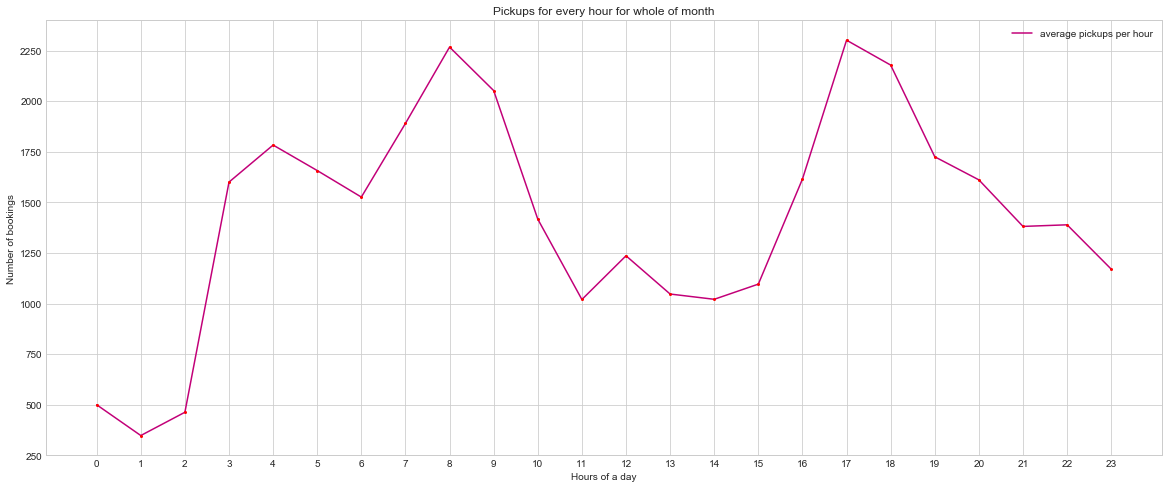

In [0]:
def bookings_in_day(frame):
    hour_pickups = []
    temp = []
    for i in range(1,8):
        for j in range(0,24):
            temp.append(frame[(frame.pickup_day == i) & (frame.pickup_hour == j)].shape[0])
        hour_pickups.append(temp)
        temp = []
    colors = ['xkcd:blue','xkcd:orange','xkcd:brown','xkcd:coral','xkcd:magenta','xkcd:green','xkcd:fuchsia']
    days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

    plt.figure(figsize=(20,8))
    hours_lis = [s for s in range(0,24)]
    for k in range(0,7):
        plt.plot(hours_lis,hour_pickups[k],colors[k],label = days[k])
        plt.plot(hours_lis,hour_pickups[k], 'ro',  markersize=2)

    plt.xticks([s for s in range(0,24)])
    plt.xlabel('Hours of a day')
    plt.ylabel('Number of bookings')
    plt.title('pickus for every hour')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    hour_pickup_month = []
    for j in range(0,24):
        hour_pickup_month.append(frame[frame.pickup_hour == j].shape[0])

    plt.figure(figsize=(20,8))
    hours_lis = [s for s in range(0,24)]
    plt.plot(hours_lis,hour_pickup_month,'xkcd:magenta',label = 'average pickups per hour')
    plt.plot(hours_lis,hour_pickup_month, 'ro',  markersize=2)

    plt.xticks([s for s in range(0,24)])
    plt.xlabel('Hours of a day')
    plt.ylabel('Number of bookings')
    plt.title('Pickups for every hour for whole of month')
    plt.legend()
    plt.grid(True)
    plt.show()

pickup_in_day(time)

In [0]:
time.head()

,from_date,to_date,tpep_pickup_datetime,pickup_day,pickup_hour
0,2013-01-01 02:00:00,,2013-01-01 02:00:00,2,2
1,2013-01-01 09:00:00,,2013-01-01 09:00:00,2,9
2,2013-01-01 03:30:00,,2013-01-01 03:30:00,2,3
3,2013-01-01 05:45:00,,2013-01-01 05:45:00,2,5
4,2013-01-01 09:00:00,,2013-01-01 09:00:00,2,9


In [0]:
time.shape

(43431, 5)

 TIme taken from one location to another

In [0]:
#Removing the NANs
newdf=df[df['to_date']!='']

In [0]:
newdf.shape

(19107, 20)

In [0]:
df['to_date']=pd.to_datetime(df['to_date'])
df['to_date']=pd.to_numeric(df['to_date'])
df['to_date']=df['to_date'].fillna(0)

In [0]:
newdf['drop_datetime'] = pd.to_datetime(newdf['to_date'])
newdf["drop_day"] = newdf['drop_datetime'].dt.strftime('%u').astype(int)
newdf["drop_hour"] = newdf['drop_datetime'].dt.strftime('%H').astype(int)
#set(time['pickup_day'].values)

In [0]:
newdf['pick_datetime'] = pd.to_datetime(newdf['from_date'])
newdf["pick_day"] = newdf['pick_datetime'].dt.strftime('%u').astype(int)
newdf["pick_hour"] = newdf['pick_datetime'].dt.strftime('%H').astype(int)
#set(time['pickup_day'].valu

In [0]:
newdf["diff"]=abs(newdf['drop_day']-newdf['pick_day'])

In [0]:
newdf=newdf.sort_values(by='diff',ascending=False)

In [0]:
Df=newdf[0:50]

In [0]:
Df[['from_area_id','to_area_id']]

,from_area_id,to_area_id
32447,87.00,499.00
39461,393.00,1056.00
22083,393.00,1119.00
13410,363.00,1371.00
18472,515.00,393.00
32453,450.00,393.00
41848,1039.00,393.00
13327,768.00,393.00
13293,585.00,58.00
36582,1280.00,393.00


In [0]:
These area ids take more time to reach!!So they must be taken more care by the company in order to have more pool in these areas

In [0]:
Similarly we can see areas with low traffic!